In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


# Import Data

In [2]:
df = pd.read_csv('data/stud.csv')

# Show top 5 Samples

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Seperate Independent and Dependent Feature
- #### I.e   Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [11]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}  ---> Count: {df['gender'].nunique()} \n ")
print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()} ---> Count: {df['race_ethnicity'].nunique()} \n")
print(f"Categories in 'parent leve of education variable: {df['parental_level_of_education'].unique()} ---> Count: {df['parental_level_of_education'].nunique()} \n")
print(f"Categories in 'lunch' varaible: {df['lunch'].unique()} ---> Count: {df['lunch'].nunique()} \n")
print(f"Cateories in 'test preparation course' variable: {df['test_preparation_course'].unique()} ---> Count: {df['test_preparation_course'].nunique()} \n")

Categories in 'gender' variable: ['female' 'male']  ---> Count: 2 
 
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E'] ---> Count: 5 

Categories in 'parent leve of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] ---> Count: 6 

Categories in 'lunch' varaible: ['standard' 'free/reduced'] ---> Count: 2 

Cateories in 'test preparation course' variable: ['none' 'completed'] ---> Count: 2 



# Selecting Numerical and Categorical Features

In [13]:
numerical_features = X.select_dtypes(exclude='O').columns
categorical_features = X.select_dtypes(include='O').columns
numerical_features
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

## Create Column Transformer for 2 types of Transformation(i.e OHE and Standard Scaler)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numerical_features),
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

## Split Dataset into Train and Test Dataset

In [17]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape , X_test.shape

((800, 19), (200, 19))

#### Create an Evaluation Function to give all metrics after training the Model

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    'Lasso': Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBossting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

dict_items([('Linear Regression', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()), ('K-Neighbors Regressor', KNeighborsRegressor()), ('Decision Tree Regressor', DecisionTreeRegressor()), ('Random Forest Regressor', RandomForestRegressor()), ('XGBRegressor', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_paral

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    'Lasso': Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBossting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list = []

for name , model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(name)
    print(name)
    print('Model performance for training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print("-" * 50)

    print('Model performance on Test set')
    print(f"- Root Mean Square Error : {model_test_rmse:.4f}")
    print(f"- Mean Absolue Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)
    print("=" * 50)
    print("\n")


Linear Regression
Model performance for training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
--------------------------------------------------
Model performance on Test set
- Root Mean Square Error : 5.3940
- Mean Absolue Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------------
Model performance on Test set
- Root Mean Square Error : 6.5197
- Mean Absolue Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------------------
Model performance on Test set
- Root Mean Square Error : 5.3904
- Mean Absolue Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175


In [39]:
result_df = pd.DataFrame(
    {
    'Model': model_list,
    'R2_Score': r2_list
    }
)


In [41]:
result_df = result_df.sort_values(by='R2_Score', ascending=False)
result_df.head()

,Model,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852603
7,CatBossting Regressor,0.851632
8,AdaBoost Regressor,0.846561


# Linear Regression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred = model.predict(X_test)

In [45]:
score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {score:.2f}")

Accuracy of the model is 0.88


## y_pred and y_test plot

Text(0, 0.5, 'Predicted')

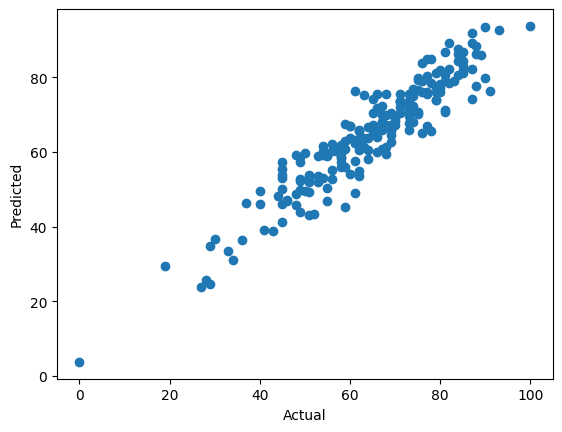

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


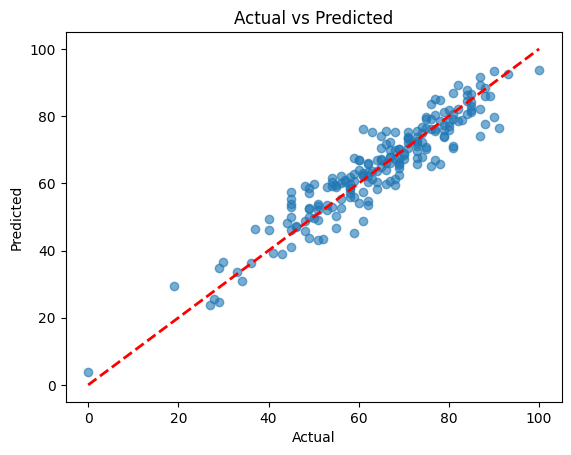

In [49]:

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # red dashed line y=x
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
